# Лабораторна робота № 1
Попередня обробка  зображень

### Завдання
Вибрати з інтернету два зображення з різною деталізацією об’єктів та два зображення з різним контрастом. Без використання жодних бібліотек для обробки зображень  (наприклад Open CV), виконати відповідне завдання (номер завдання вказано у  рейтинговій таблиці).

### Варіант №5

5. Виконати фільтрацію Гауса з різними значеннями параметрами ядра розмиття. Провести порівняльний аналіз.

In [32]:
import numpy as np
import matplotlib.pyplot as plt

In [33]:
def gaussian_kernel(size: int, sigma: float = 1) -> np.ndarray:
    x, y = np.meshgrid(np.linspace(-1, 1, size), np.linspace(-1, 1, size))
    kernel = np.exp(-((x * x + y * y) / (2.0 * sigma**2)))
    return kernel / np.sum(kernel)

In [34]:
def gaussian_filter(img: np.ndarray, kernel_size: int, sigma: float) -> np.ndarray:
    kernel = gaussian_kernel(size=kernel_size, sigma=sigma)

    # pad the image with zeros so that the kernel can be applied to pixels at the edges of the image
    pad_size = kernel_size // 2
    padded_img = np.pad(
        img, ((pad_size, pad_size), (pad_size, pad_size), (0, 0)), mode="constant"
    )

    filtered_img = np.zeros_like(img)
    channels, width, height = img.shape
    for i in range(channels):
        for j in range(width):
            for k in range(height):
                window = padded_img[i: i + kernel_size, j: j + kernel_size, k]
                filtered_img[i, j, k] = np.sum(window * kernel)

    return filtered_img

In [35]:
# img = plt.imread("vegetables.jpeg")
#
# kernels = [3, 5, 7, 9]
#
# fig, axs = plt.subplots(2, 2, figsize=(10, 10))
#
# for i, kernel_size in enumerate(kernels):
#     sigma = kernel_size / 3.0
#     res_img = gaussian_filter(img, kernel_size, sigma)
#
#     row, col = i // 2, i % 2
#     axs[row, col].imshow(res_img)
#     axs[row, col].set_title(f"Kernel size = {kernel_size} Sigma = {sigma}", fontsize=10)
#
# plt.show()

In [36]:
def display_gaussian(image: np.array, kernel_sizes: list[int]) -> None:
    fig, axs = plt.subplots(2, 2, figsize=(10, 10))

    for i, kernel_size in enumerate(kernel_sizes):
        sigma = kernel_size / 3.0
        filtered = gaussian_filter(image, kernel_size, sigma)

        row, col = i // 2, i % 2
        axs[row, col].imshow(filtered)
        axs[row, col].set_title(f"Kernel size = {kernel_size} Sigma = {sigma}", fontsize=10)

    plt.show()

In [59]:
import os

def collect_image_names(relative_path: str):
    collected_files = os.listdir(relative_path)

    res = []
    for file in collected_files:
        _, extension = os.path.splitext(file)
        if extension in [".jpeg", ".png", '.jpg']:
            res.append(file)
    print(res)
    return res

['high_detailed.jpeg', 'high_contrast.jpeg', 'low_contrast.jpeg', 'low_detailed.jpeg']


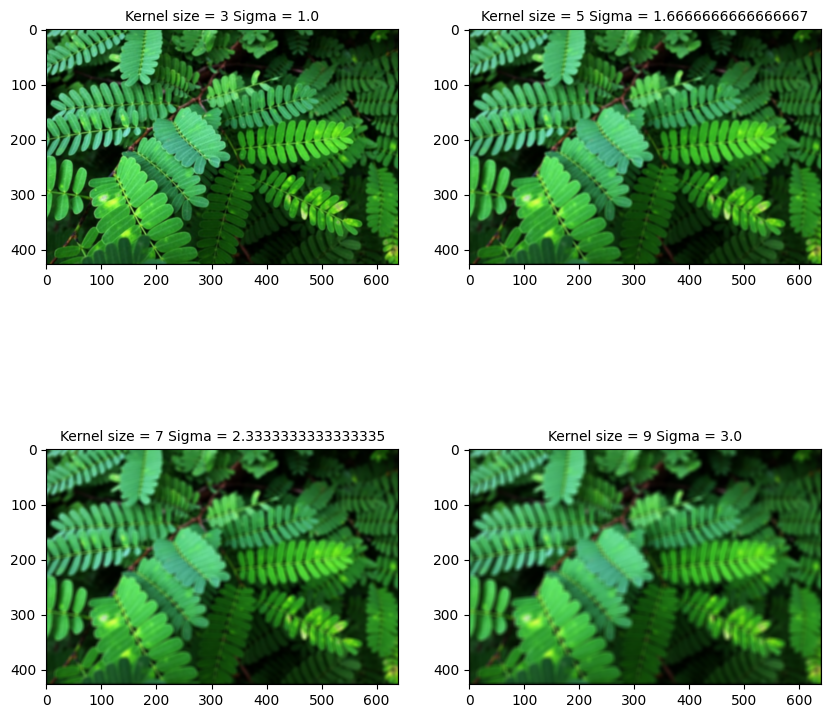

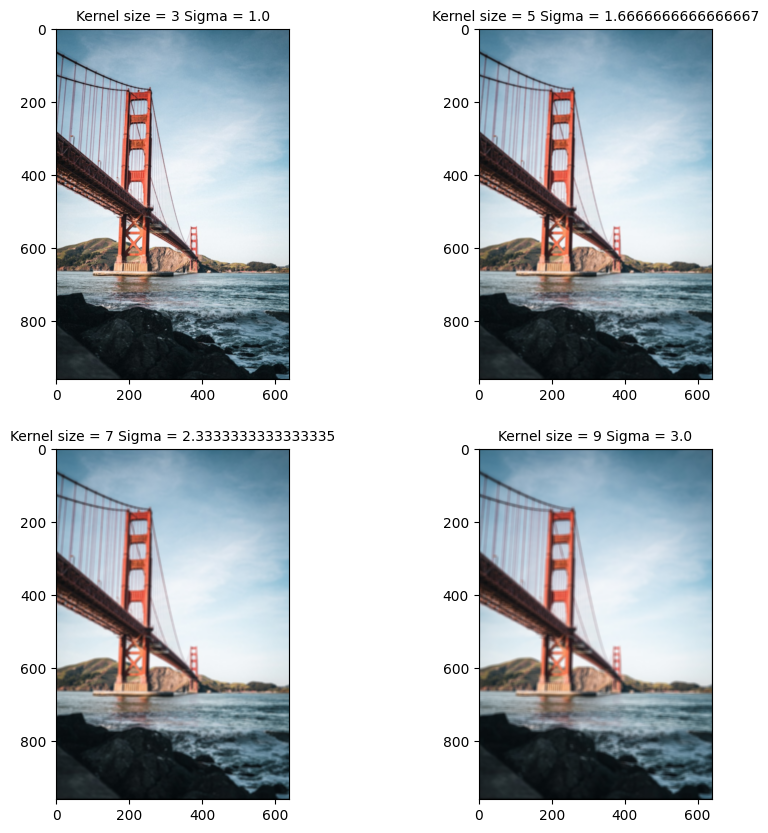

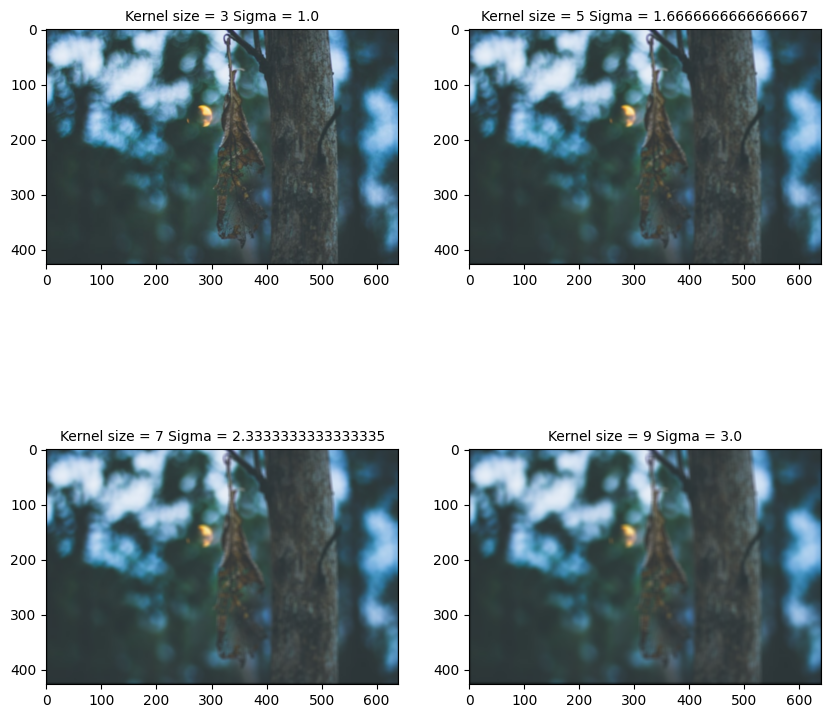

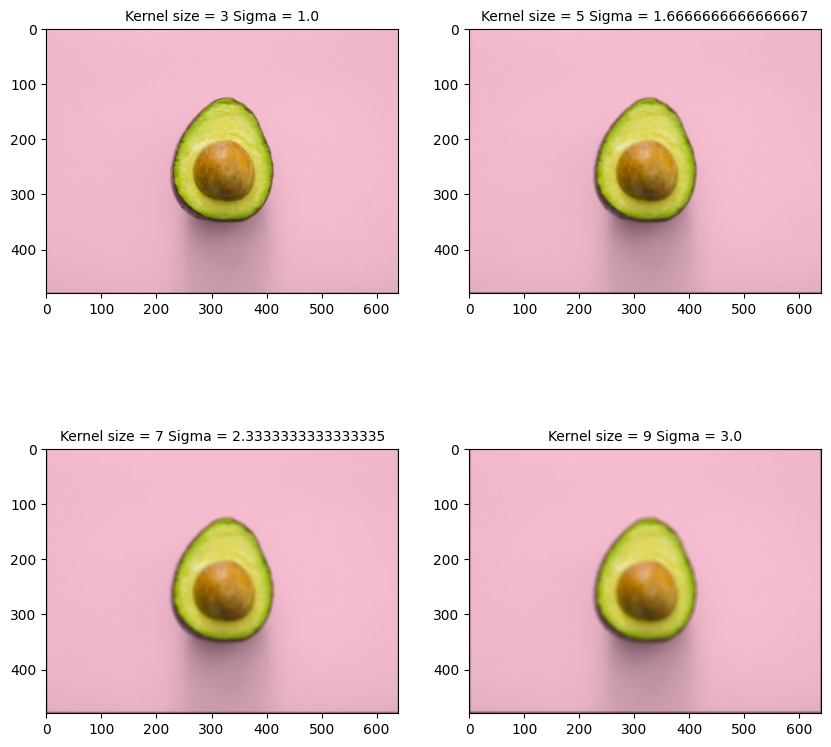

In [86]:
kernels = [3, 5, 7, 9]
IMAGE_DIR = "images"
collected_images = collect_image_names(IMAGE_DIR)

for name in collected_images:
    img = plt.imread(f"{IMAGE_DIR}/{name}")
    display_gaussian(img, kernels)

### Додаткове завдання
Вибрати один із методів морфолологічної  обробки (див. Леція №2) і написати приклад його застосування без використання сторонніх  бібліотек.

In [ ]:
def get_kernel(n: int) -> np.ndarray:
    return  np.ones((n, n), np.uint8)

['mon1thr1.jpeg']
['mon1thr1.jpeg']


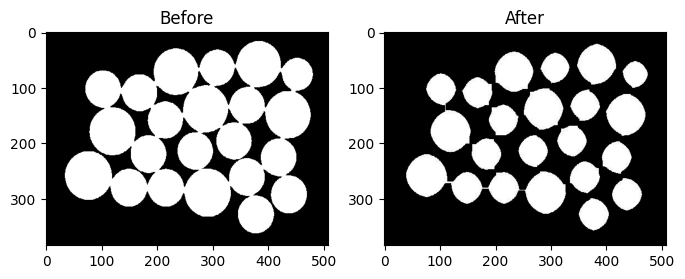

In [83]:
from PIL import Image

IMAGE_DIR = "images/morphological"
collected_images = collect_image_names(IMAGE_DIR)
print(collected_images)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 8))

for name in collected_images:
    img = np.array(Image.open(f"{IMAGE_DIR}/{name}").convert('L'))
    ax1.imshow(img, cmap="gray")
    ax1.set_title("Before")
    m, n = img.shape

    k = 11
    structuring_element = np.ones((k, k), dtype=np.uint8)
    dist = (k - 1) // 2

    img_erode = np.zeros_like(img)
    for i in range(dist, m - dist):
        for j in range(dist, n - dist):
            window = img[i - dist: i + dist + 1, j - dist: j + dist + 1]
            product = window * structuring_element
            img_erode[i, j] = np.min(product)

    ax2.imshow(img_erode, cmap="gray")
    ax2.set_title("After")
    # plt.imshow(img_erode, cmap="gray")